In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
#standardize the columns data
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
#only the feature column are to be scaled
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
scaled_ft = scaler.transform(df.drop('TARGET CLASS', axis = 1))
scaled_ft
#returns a numpy array

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
df_scaled = pd.DataFrame(data = scaled_ft , columns = df.columns[:-1])
df_scaled.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


In [12]:
#splitting in train and test
from sklearn.model_selection import train_test_split

In [13]:
X = df_scaled
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)    

KNeighborsClassifier(n_neighbors=1)

In [16]:
preds = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
print(confusion_matrix(y_test, preds))

[[151   8]
 [ 15 126]]


In [24]:
#choosing correct K value using elbow method
error_rate = []

for i in range(1,50):
    i_knn = KNeighborsClassifier(n_neighbors= i)
    i_knn.fit(X_train, y_train)
    i_preds = i_knn.predict(X_test)
    error_rate.append(np.mean(i_preds != y_test))

Text(0, 0.5, 'Error Rate')

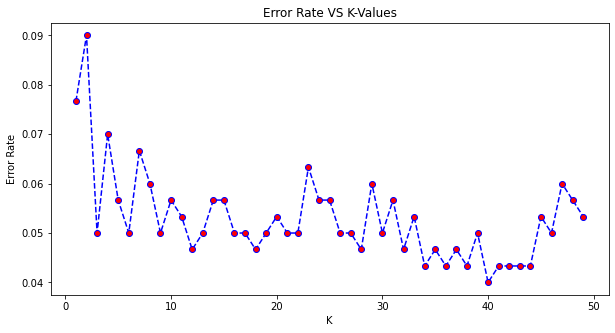

In [33]:
#plotting the error_rate

plt.figure(figsize=(10,5))
plt.plot(range(1,50), error_rate, color = 'blue', 
         linestyle = '--', marker = 'o', markerfacecolor = 'red')
plt.title('Error Rate VS K-Values')
plt.xlabel('K')
plt.ylabel('Error Rate')
#it is visible from the plot that we are having the least error around k = 40

In [34]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [36]:
print(classification_report(y_test, preds))
print('/n')
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

/n
[[154   5]
 [ 12 129]]


In [37]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [38]:
print(classification_report(y_test, preds))
print('/n')
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

/n
[[154   5]
 [  7 134]]
